# 1. Introduction
For this project, we are using a dataset for predicting room occupancy with using environmental observations such as temperature, humidity and CO2 level. This is an experimental dataset, these predictions might help Heating, Ventilating and Air Conditioning (HVAC) sector. For instance, we are using sensors like thermostats to get information about the environment and with that info our system decides to heat or not situation. But if the thermostat set manually by a occupant before and there is no more occupants in the environment, what then? The system won't shutdown until it gets set values, and this situation will lead high energy consumption. 


# 2. Importing Libraries

In the code below are given some libraries which we are going to use throughout this notebook.


In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory


# Importing necessary libraries for this notebook.
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
from plotly.offline import init_notebook_mode, iplot, plot
init_notebook_mode(connected=True)
import plotly.express as px
import plotly.graph_objects as go

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix


from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.regularizers import l2, l1
from keras.metrics import BinaryAccuracy

# 3. Reading the Dataset

A critical step in working with machine learning models is preparing the data correctly. Variables on different scales make it difficult for the network to efficiently learn the correct weights. Below, we've written the code to load and prepare the data. You'll learn more about this soon!

In [2]:
# mentioning the datapath

data_path_test=''
data_path_test2=''
data_path_training=''

# loading the dataset

datatest = pd.read_csv("data_path_test")
datatest2 = pd.read_csv("data_path_test2")
datatraining = pd.read_csv("data_path_training")

# 4. Exploratory Data Analysis

* Exploratory Data Analysis refers to the critical process of performing initial investigations on data so as to discover patterns,to spot anomalies,to test hypothesis and to check assumptions with the help of summary statistics and graphical representations.

* It is a good practice to understand the data first and try to gather as many insights from it. EDA is all about making sense of data in hand,before getting them dirty with it.

* There are 3 types of EDA Analysis, we will do them all step by step.

We have three different .txt file as datatest, datatest2 and datatraining. Lets analyze them step by step.

## a) Uni-variate Analysis

* “Uni” means one and “Variate” means variable hence univariate analysis means analysis of one variable or one feature. Univariate basically tells us how data in each feature is distributed and also tells us about central tendencies like mean, median, and mode.

In [3]:
print(datatest.info())
datatest.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2665 entries, 140 to 2804
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           2665 non-null   object 
 1   Temperature    2665 non-null   float64
 2   Humidity       2665 non-null   float64
 3   Light          2665 non-null   float64
 4   CO2            2665 non-null   float64
 5   HumidityRatio  2665 non-null   float64
 6   Occupancy      2665 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 166.6+ KB
None


,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
140,2015-02-02 14:19:00,23.7000,26.272,585.200000,749.200000,0.004764,1
141,2015-02-02 14:19:59,23.7180,26.290,578.400000,760.400000,0.004773,1
142,2015-02-02 14:21:00,23.7300,26.230,572.666667,769.666667,0.004765,1
143,2015-02-02 14:22:00,23.7225,26.125,493.750000,774.750000,0.004744,1
144,2015-02-02 14:23:00,23.7540,26.200,488.600000,779.000000,0.004767,1


In [4]:
print(datatest2.info())
datatest2.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9752 entries, 1 to 9752
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           9752 non-null   object 
 1   Temperature    9752 non-null   float64
 2   Humidity       9752 non-null   float64
 3   Light          9752 non-null   float64
 4   CO2            9752 non-null   float64
 5   HumidityRatio  9752 non-null   float64
 6   Occupancy      9752 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 609.5+ KB
None


,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,2015-02-11 14:48:00,21.7600,31.133333,437.333333,1029.666667,0.005021,1
2,2015-02-11 14:49:00,21.7900,31.000000,437.333333,1000.000000,0.005009,1
3,2015-02-11 14:50:00,21.7675,31.122500,434.000000,1003.750000,0.005022,1
4,2015-02-11 14:51:00,21.7675,31.122500,439.000000,1009.500000,0.005022,1
5,2015-02-11 14:51:59,21.7900,31.133333,437.333333,1005.666667,0.005030,1


In [5]:
print(datatraining.info())
datatraining.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8143 entries, 1 to 8143
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           8143 non-null   object 
 1   Temperature    8143 non-null   float64
 2   Humidity       8143 non-null   float64
 3   Light          8143 non-null   float64
 4   CO2            8143 non-null   float64
 5   HumidityRatio  8143 non-null   float64
 6   Occupancy      8143 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 508.9+ KB
None


,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,2015-02-04 17:51:00,23.18,27.2720,426.0,721.25,0.004793,1
2,2015-02-04 17:51:59,23.15,27.2675,429.5,714.00,0.004783,1
3,2015-02-04 17:53:00,23.15,27.2450,426.0,713.50,0.004779,1
4,2015-02-04 17:54:00,23.15,27.2000,426.0,708.25,0.004772,1
5,2015-02-04 17:55:00,23.10,27.2000,426.0,704.50,0.004757,1


All text files has seven columns as date, temperature, humidity, light, CO2, humidity ratio and occupancy. 
* Temperature in Celsius.
* Relative humidity as a percentage.
* Light measured in lux.
* Carbon dioxide measured in parts per million.
* Humidity ratio, derived from temperature and relative humidity measured in kilograms of water vapor per kilogram of air.
* Occupancy as either 1 for occupied or 0 for not occupied.

For training and testing the models, we will use datatraining(8143 instances) as training, datatest(2665 instances) as validation and datatest2(9752 instances) as test data.

In [6]:
# converting date attribute to pandas datetime format

datatest['date'] = pd.to_datetime(datatest['date'])
datatest2['date'] = pd.to_datetime(datatest2['date'])
datatraining['date'] = pd.to_datetime(datatraining['date'])
datatest.reset_index(drop=True, inplace=True)
datatest2.reset_index(drop=True, inplace=True)
datatraining.reset_index(drop=True, inplace=True)

In [7]:
# describing the dataset

datatraining.describe()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
count,8143.000000,8143.000000,8143.000000,8143.000000,8143.000000,8143.000000
mean,20.619084,25.731507,119.519375,606.546243,0.003863,0.212330
std,1.016916,5.531211,194.755805,314.320877,0.000852,0.408982
min,19.000000,16.745000,0.000000,412.750000,0.002674,0.000000
25%,19.700000,20.200000,0.000000,439.000000,0.003078,0.000000
50%,20.390000,26.222500,0.000000,453.500000,0.003801,0.000000
75%,21.390000,30.533333,256.375000,638.833333,0.004352,0.000000
max,23.180000,39.117500,1546.333333,2028.500000,0.006476,1.000000


Since we have low values like humidity_ratio and high values like light and CO2, we should normalize the data to simplfy the learning process.

In [8]:
# normaliz the dataset

scaler = MinMaxScaler()
columns = ['Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio']
scaler.fit(np.array(datatraining[columns]))
datatest[columns] = scaler.transform(np.array(datatest[columns]))
datatest2[columns] = scaler.transform(np.array(datatest2[columns]))
datatraining[columns] = scaler.transform(np.array(datatraining[columns]))

Now lets analyze all numerical features of this dataset (except our target variable) using Box Plots.

**What are Box Plots??**

* Seaborn boxplot is a very basic plot Boxplots are used to visualize distributions. Thats very useful when you want to compare data between two groups. Sometimes a boxplot is named a box-and-whisker plot. Any box shows the quartiles of the dataset while the whiskers extend to show the rest of the distribution.


       Temperature     Humidity        Light          CO2  HumidityRatio
count  8143.000000  8143.000000  8143.000000  8143.000000    8143.000000
mean      0.387341     0.401676     0.077292     0.119942       0.312576
std       0.243281     0.247233     0.125947     0.194536       0.224186
min       0.000000     0.000000     0.000000     0.000000       0.000000
25%       0.167464     0.154431     0.000000     0.016246       0.106304
50%       0.332536     0.423623     0.000000     0.025220       0.296338
75%       0.571770     0.616307     0.165795     0.139925       0.441308
max       1.000000     1.000000     1.000000     1.000000       1.000000


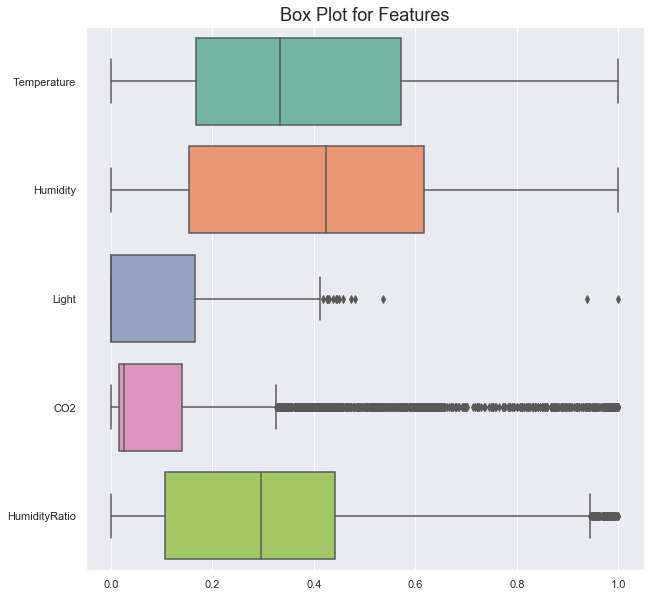

In [9]:
plt.figure(figsize=(10,10))
plt.title('Box Plot for Features', fontdict={'fontsize':18})
ax = sns.boxplot(data=datatraining.drop(['date', 'Occupancy'],axis=1), orient="h", palette="Set2")
print(datatraining.drop(['date', 'Occupancy'],axis=1).describe())

## b) Multi-Variate Analysis

* Multivariate analysis (MVA) is based on the principles of multivariate statistics, which involves observation and analysis of more than one statistical outcome variable at a time. Typically, MVA is used to address the situations where multiple measurements are made on each experimental unit and the relations among these measurements and their structures are important.
* Essentially, multivariate analysis is a tool to find patterns and relationships between several variables simultaneously. It lets us predict the effect a change in one variable will have on other variables. ... This gives multivariate analysis a decisive advantage over other forms of analysis.

Lets analyze some closely corelating features of this dataset by making a heatmap using seaborn library.

**What is a heatmap??**
* A heatmap is a two-dimensional graphical representation of data where the individual values that are contained in a matrix are represented as colors. The seaborn python package allows the creation of annotated heatmaps which can be tweaked using Matplotlib tools as per the creator's requirement.

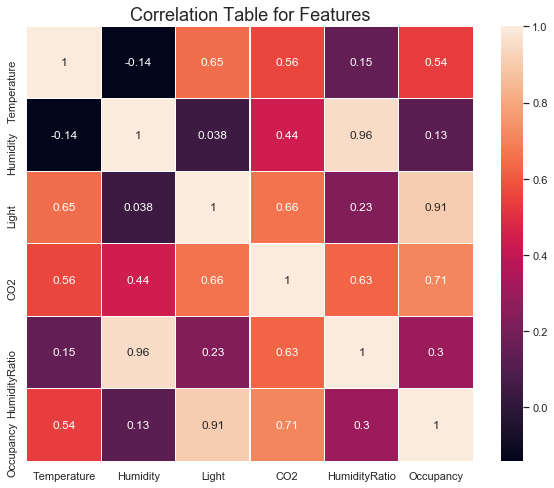

In [10]:
plt.figure(figsize=(10,8))
plt.title('Correlation Table for Features', fontdict={'fontsize':18})
ax = sns.heatmap(datatraining.corr(), annot=True, linewidths=.2)

We can see the correlations between occupancy and the others. As I expected, light value is more correlated with occupancy than others.

Lets analyze some correlating features of this dataset using a 3 dimension scatter plot.
You will use "Temperature", "Humidity", "Co2" as your 3 dimensions and you will also "Light" as size of these dots as our 4th dimension .

In [11]:
data = datatraining.copy()
data.Occupancy = data.Occupancy.astype(str)
fig = px.scatter_3d(data, x='Temperature', y='Humidity', z='CO2', size='Light', color='Occupancy', color_discrete_map={'1':'red', '0':'blue'})
fig.update_layout(scene_zaxis_type="log", title={'text': "Features and Occupancy",
                                                'y':0.9,
                                                'x':0.5,
                                                'xanchor': 'center',
                                                'yanchor': 'top'})
iplot(fig)

Let's look on the 4-dimensional plot for occupancy. The 4th dimension is size of dots here and we used light value as 4th dimension. The higher light will lead to bigger dots and the lower light will lead to smaller dots. You can use your mouse to change your perspective and take a closer look on the graph.

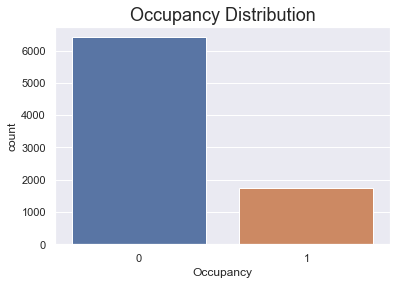

In [12]:
# checking distribution of target column

sns.set(style="darkgrid")
plt.title("Occupancy Distribution", fontdict={'fontsize':18})
ax = sns.countplot(x="Occupancy", data=datatraining)

Our data is unbalanced, so we need to find another relations between features to strengthen our predictions. I have a question at this point, is there any relation between occupancy and the hour of the day? Let's look into it.

In [13]:
hours_1 = []
hours_0 = []
for date in datatraining[datatraining['Occupancy'] == 1]['date']:
    hours_1.append(date.hour)
for date in datatraining[datatraining['Occupancy'] == 0]['date']:
    hours_0.append(date.hour)

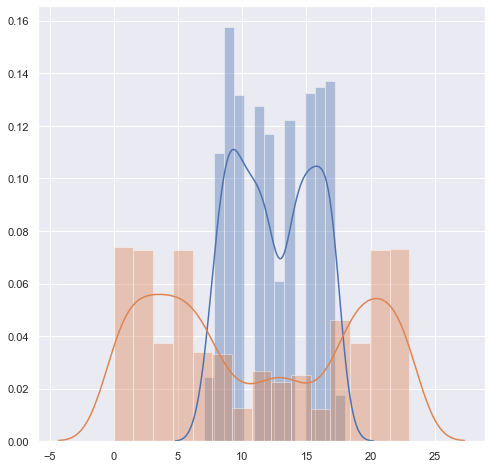

In [14]:
plt.figure(figsize=(8,8))
ax = sns.distplot(hours_1)
ax = sns.distplot(hours_0)

From above histogram, what can you say? Between 07:00 and 18:00 there are occupants in the environment or not. But the time come to non-working hours, then we can absolutely say that there is no occupant. With this information, we will create a new feature from date column as day period.
* 07:00 - 18:00 working hour (labeled as 1)
* rest of the day non-working hour (labeled as 0)

In [15]:
# creating new feature "period_of_day" from date column

datatest['period_of_day'] = [1 if (i.hour >= 7 and i.hour <= 17) else 0 for i in datatest['date']]
datatest2['period_of_day'] = [1 if (i.hour >= 7 and i.hour <= 17) else 0 for i in datatest2['date']]
datatraining['period_of_day'] = [1 if (i.hour >= 7 and i.hour <= 17) else 0 for i in datatraining['date']]
datatraining.sample(10)

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy,period_of_day
2805,2015-02-06 16:36:00,0.653110,0.203300,0.292951,0.296405,0.195928,1,1
7436,2015-02-09 21:47:00,0.358852,0.748910,0.000000,0.143741,0.611839,0,0
2980,2015-02-06 19:31:00,0.382775,0.113756,0.000000,0.059879,0.056073,0,0
2705,2015-02-06 14:55:59,0.765550,0.186613,0.338543,0.279901,0.205919,1,1
3606,2015-02-07 05:57:00,0.167464,0.118226,0.000000,0.021816,0.018498,0,0
3779,2015-02-07 08:50:00,0.161483,0.121913,0.020047,0.026149,0.020453,0,1
6898,2015-02-09 12:49:00,0.571770,0.757850,0.332399,0.565527,0.694823,1,1
3172,2015-02-06 22:43:00,0.239234,0.093642,0.000000,0.017484,0.011162,0,0
2234,2015-02-06 07:05:00,0.287081,0.082914,0.000000,0.013152,0.010845,0,1
5085,2015-02-08 06:36:00,0.058612,0.659515,0.000000,0.011295,0.439537,0,0


# 5. Model Implementation

In [16]:
# separting the target variables from the all the datasets

X_train = datatraining.drop(columns=['date', 'Occupancy'], axis=1)
y_train = datatraining['Occupancy']
X_validation = datatest.drop(columns=['date', 'Occupancy'], axis=1)
y_validation = datatest['Occupancy']
X_test = datatest2.drop(columns=['date', 'Occupancy'], axis=1)
y_test = datatest2['Occupancy']

## 5.1. KNN (K-Nearest Neighbors)
Let's try different hyperparameters on KNN model such as n_neighbors, weights and metrics to find best options.

In [17]:
# parameter-tuning for knn

n_neighbors_list = [7,15,45,135]
weights_list = ['uniform', 'distance']
metric_list = ['euclidean', 'manhattan']
accuracies = {}
for n in n_neighbors_list:
    for weight in weights_list:
        for metric in metric_list:
            knn_model = KNeighborsClassifier(n_neighbors=n, weights=weight, metric=metric)
            knn_model.fit(X_train, y_train)
            accuracy = knn_model.score(X_validation, y_validation)
            accuracies[str(n)+"/"+weight+"/"+metric] = accuracy

In [18]:
plotdata = pd.DataFrame()
plotdata['Parameters'] = accuracies.keys()
plotdata['Accuracy'] = accuracies.values()
fig = px.line(plotdata, x="Parameters", y="Accuracy")
fig.update_layout(title={'text': "Accuracies for Different Hyper-Parameters",
                                                'x':0.5,
                                                'xanchor': 'center',
                                                'yanchor': 'top'})
iplot(fig)

By looking over the accuracies graph:
* 135 is enough for k-value.
* Manhattan distance performs better when k has low value. If k value is higher than usual euclidean is the better option.
* Uniform weights are better.

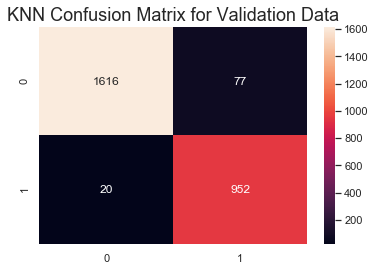

In [19]:
# using optimal parameters for model building and printing confusion matrix

knn_model = KNeighborsClassifier(n_neighbors=135)
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_validation)
plt.title("KNN Confusion Matrix for Validation Data", fontdict={'fontsize':18})
ax = sns.heatmap(confusion_matrix(y_validation, y_pred), annot=True, fmt="d")

## 5.2. SVM (Support-Vector Machine)

In [20]:
# training the model using SVM and printing its accuracy on validation dataset

svm_model = SVC()
svm_model.fit(X_train, y_train)
print("Accuracy for SVM on validation data: {}%".format(round((svm_model.score(X_validation, y_validation)*100),2)))

Accuracy for SVM on validation data: 97.82%


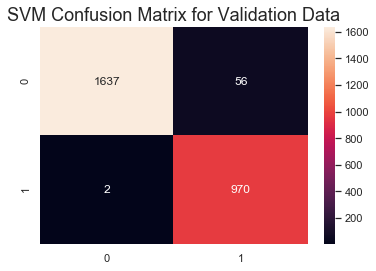

In [21]:
# print the confusion matrix on validation dataset of SVM model

y_pred = svm_model.predict(X_validation)
plt.title("SVM Confusion Matrix for Validation Data", fontdict={'fontsize':18})
ax = sns.heatmap(confusion_matrix(y_validation, y_pred), annot=True, fmt="d")

Our Machine Learning models doing well with validation data.

# 6. Classification with Neural Networks
Firsty, we would like to try different models like with or without regularization methods. We will create four different models:
1. Without regularization
2. With 0.2 dropout regularization
3. With L1(Lasso) regularization
4. With L2(Ridge) regularization

After all models trained and evaluated with validation data, we will compare the training and validation losses.

In [ ]:
# NN without regularization

model1 = Sequential()
model1.add(Dense(32, activation='relu', input_dim=6))
model1.add(Dense(16, activation='relu'))
model1.add(Dense(1, activation='sigmoid'))
model1.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
history1 = model1.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_validation, y_validation))

In [23]:
# NN with 0.2 dropout ratio before the hidden layer.

model2 = Sequential()
model2.add(Dense(32, activation='relu', input_dim=6))
model2.add(Dropout(0.2))
model2.add(Dense(16, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))
model2.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
history2 = model2.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_validation, y_validation))

Train on 8143 samples, validate on 2665 samples
Epoch 1/50
8143/8143 [==============================] - 1s 79us/step - loss: 0.3744 - accuracy: 0.8795 - val_loss: 0.1567 - val_accuracy: 0.9542
Epoch 2/50
8143/8143 [==============================] - 1s 65us/step - loss: 0.1116 - accuracy: 0.9693 - val_loss: 0.1122 - val_accuracy: 0.9621
Epoch 3/50
8143/8143 [==============================] - 0s 57us/step - loss: 0.0803 - accuracy: 0.9779 - val_loss: 0.1040 - val_accuracy: 0.9711
Epoch 4/50
8143/8143 [==============================] - 0s 54us/step - loss: 0.0656 - accuracy: 0.9815 - val_loss: 0.0945 - val_accuracy: 0.9715
Epoch 5/50
8143/8143 [==============================] - 0s 55us/step - loss: 0.0614 - accuracy: 0.9822 - val_loss: 0.0868 - val_accuracy: 0.9715
Epoch 6/50
8143/8143 [==============================] - 0s 55us/step - loss: 0.0569 - accuracy: 0.9842 - val_loss: 0.0833 - val_accuracy: 0.9767
Epoch 7/50
8143/8143 [==============================] - 0s 54us/step - loss: 0.054

In [24]:
# NN with L1(Lasso) regularization

model3 = Sequential()
model3.add(Dense(32, activation='relu', input_dim=6, kernel_regularizer=l1(l=0.01)))
model3.add(Dense(16, activation='relu', kernel_regularizer=l1(l=0.01)))
model3.add(Dense(1, activation='sigmoid'))
model3.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
history3 = model3.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_validation, y_validation))

Train on 8143 samples, validate on 2665 samples
Epoch 1/50
8143/8143 [==============================] - 1s 71us/step - loss: 1.1278 - accuracy: 0.8222 - val_loss: 0.6248 - val_accuracy: 0.8792
Epoch 2/50
8143/8143 [==============================] - 0s 51us/step - loss: 0.4280 - accuracy: 0.9579 - val_loss: 0.4036 - val_accuracy: 0.9253
Epoch 3/50
8143/8143 [==============================] - 0s 51us/step - loss: 0.3392 - accuracy: 0.9684 - val_loss: 0.3319 - val_accuracy: 0.9445
Epoch 4/50
8143/8143 [==============================] - 0s 52us/step - loss: 0.2945 - accuracy: 0.9732 - val_loss: 0.2936 - val_accuracy: 0.9561
Epoch 5/50
8143/8143 [==============================] - 0s 51us/step - loss: 0.2654 - accuracy: 0.9762 - val_loss: 0.2691 - val_accuracy: 0.9651
Epoch 6/50
8143/8143 [==============================] - 0s 51us/step - loss: 0.2398 - accuracy: 0.9792 - val_loss: 0.2442 - val_accuracy: 0.9685
Epoch 7/50
8143/8143 [==============================] - 0s 51us/step - loss: 0.215

In [25]:
# NN with L2(Ridge) Regularization

model4 = Sequential()
model4.add(Dense(32, activation='relu', input_dim=6, kernel_regularizer=l2(l=0.01)))
model4.add(Dense(16, activation='relu', kernel_regularizer=l2(l=0.01)))
model4.add(Dense(1, activation='sigmoid'))
model4.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
history4 = model4.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_validation, y_validation))

Train on 8143 samples, validate on 2665 samples
Epoch 1/50
8143/8143 [==============================] - 1s 70us/step - loss: 0.5398 - accuracy: 0.8852 - val_loss: 0.3487 - val_accuracy: 0.9347
Epoch 2/50
8143/8143 [==============================] - 0s 51us/step - loss: 0.2515 - accuracy: 0.9719 - val_loss: 0.2348 - val_accuracy: 0.9467
Epoch 3/50
8143/8143 [==============================] - 0s 52us/step - loss: 0.2037 - accuracy: 0.9731 - val_loss: 0.2053 - val_accuracy: 0.9497
Epoch 4/50
8143/8143 [==============================] - 0s 51us/step - loss: 0.1824 - accuracy: 0.9758 - val_loss: 0.1870 - val_accuracy: 0.9617
Epoch 5/50
8143/8143 [==============================] - 0s 51us/step - loss: 0.1692 - accuracy: 0.9763 - val_loss: 0.1764 - val_accuracy: 0.9591
Epoch 6/50
8143/8143 [==============================] - 0s 51us/step - loss: 0.1597 - accuracy: 0.9788 - val_loss: 0.1710 - val_accuracy: 0.9580
Epoch 7/50
8143/8143 [==============================] - 0s 51us/step - loss: 0.152

In [ ]:
# plotting the losses

loss1 = history1.history['loss']
val_loss1 = history1.history['val_loss']
loss2 = history2.history['loss']
val_loss2 = history2.history['val_loss']
loss3 = history3.history['loss']
val_loss3 = history3.history['val_loss']
loss4 = history4.history['loss']
val_loss4 = history4.history['val_loss']


fig = go.Figure()
fig.add_trace(go.Scatter(x=np.arange(len(loss1)), y=loss1,
                    name='Training Loss without Regularization', line=dict(color='royalblue')))
fig.add_trace(go.Scatter(x=np.arange(len(val_loss1)), y=val_loss1,
                    name='Validation Loss without Regularization', line = dict(color='firebrick')))

fig.add_trace(go.Scatter(x=np.arange(len(loss2)), y=loss2,
                    name='Training Loss with Dropout', line=dict(color='royalblue', dash='dash')))
fig.add_trace(go.Scatter(x=np.arange(len(val_loss2)), y=val_loss2,
                    name='Validation Loss with Dropout', line = dict(color='firebrick', dash='dash')))

fig.add_trace(go.Scatter(x=np.arange(len(loss3)), y=loss3,
                    name='Training Loss with L1 Regularization', line=dict(color='royalblue', dash='dot')))
fig.add_trace(go.Scatter(x=np.arange(len(val_loss3)), y=val_loss3,
                    name='Validation Loss with L1 Regularization', line = dict(color='firebrick', dash='dot')))

fig.add_trace(go.Scatter(x=np.arange(len(loss4)), y=loss4,
                    name='Training Loss with L2 Regularization', line=dict(color='royalblue', dash='longdashdot')))
fig.add_trace(go.Scatter(x=np.arange(len(val_loss4)), y=val_loss4,
                    name='Validation Loss with L2 Regularization', line = dict(color='firebrick', dash='longdashdot')))


fig.update_layout(xaxis_title='Epochs',
                  yaxis_title='Loss',
                  title={'text': "Training and Validation Losses for Different Models",
                                                'x':0.5,
                                                'xanchor': 'center',
                                                'yanchor': 'top'})
iplot(fig)

* NN without regularization is unstabilized as expected.
* Dropout and L2 regularization doing well.
* L1 regularization is stable but it has biggest loss value.

So our best option will be a dropout layer and L2 regularization on layers. Let's train it.

P.S. You can click on the legend to close some of lines. It might be useful when examining the plot.

In [27]:
# training our final neural network using dropout and L2 regularization

model = Sequential()
model.add(Dense(32, activation='relu', input_dim=6, kernel_regularizer=l2(l=0.01)))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu', kernel_regularizer=l2(l=0.01)))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
                loss='binary_crossentropy',
                metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=50, batch_size=32)

Epoch 1/50
8143/8143 [==============================] - 1s 66us/step - loss: 0.5717 - accuracy: 0.8600
Epoch 2/50
8143/8143 [==============================] - 0s 45us/step - loss: 0.2580 - accuracy: 0.9559
Epoch 3/50
8143/8143 [==============================] - 0s 46us/step - loss: 0.2033 - accuracy: 0.9639
Epoch 4/50
8143/8143 [==============================] - 0s 45us/step - loss: 0.1778 - accuracy: 0.9714
Epoch 5/50
8143/8143 [==============================] - 0s 45us/step - loss: 0.1618 - accuracy: 0.9743
Epoch 6/50
8143/8143 [==============================] - 0s 45us/step - loss: 0.1510 - accuracy: 0.9778
Epoch 7/50
8143/8143 [==============================] - 0s 45us/step - loss: 0.1432 - accuracy: 0.9784
Epoch 8/50
8143/8143 [==============================] - 0s 45us/step - loss: 0.1366 - accuracy: 0.9807
Epoch 9/50
8143/8143 [==============================] - 0s 45us/step - loss: 0.1331 - accuracy: 0.9802
Epoch 10/50
8143/8143 [==============================] - 0s 45us/step - l

# 7. Comparing Performances of SVM and Neural Network
Let's test our models with the test data. This data has nearly 10000 instances. We will evaluate them with accuracy metric first, after then we will look into confusion matrix.

In [28]:
print("Accuracy for SVM on test data: {}%\n".format(round((svm_model.score(X_test, y_test)*100),2)))
print("Accuracy for Neural Network model on test data: {}%".format(round((model.evaluate(X_test, y_test)[1]*100),2)))

Accuracy for SVM on test data: 98.38%

9752/9752 [==============================] - 0s 26us/step
Accuracy for Neural Network model on test data: 98.9%


Seems very close right?

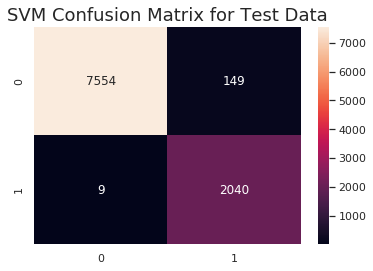

In [29]:
y_pred = svm_model.predict(X_test)
plt.title("SVM Confusion Matrix for Test Data", fontdict={'fontsize':18})
ax = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d")

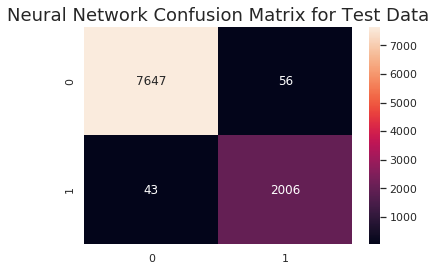

In [30]:
y_pred = model.predict(X_test)
threshold = 0.6
y_pred = [1 if i >= threshold else 0 for i in y_pred]
plt.title("Neural Network Confusion Matrix for Test Data", fontdict={'fontsize':18})
ax = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d")

# 8. Conclusion
Both of the models did great job when predicting occupancy. Our accuracy is nearly 98%. So what do you think, which method (ML or DL) is suitable for this dataset and problem?

Before answer that, look at the confusion matrix which are created when evaluating models with the test data. SVM model looks like biased toward occupied class. But we don't have that problem with neural network. So we can say that, we could use neural network for more stable and accurate results without significant errors.

In [ ]:
# write your conclusion here